## Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In [1]:
def multiply(A, B):
    n, k1 = len(A), len(A[0])
    k2, m = len(B), len(B[0])

    if k1 != k2:
        return ValueError

    C = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for k in range(k1):
                C[i][j] += (A[i][k] * B[k][j])

    return C

### As seen in the above code, the no. of multiplications are (n * m * k) and the no. of additions are (n * m * (k-1))

### In matrix multiplication between a (n, k) matrix A and a (k, m) matrix B, the resulting matrix C will have dimensions (n, m).

### To compute each element of the resulting matrix C, you need one multiplication and one addition for each element in the row of A and the corresponding element in the column of B. Since there are k elements in each row of A and k elements in each column of B, you need k multiplications and k-1 additions for each element of C. Therefore, for one element in C, you perform k multiplications and k-1 additions.

### For a matrix of size (n, m), there are n x m elements, so the total number of multiplications and additions needed for the entire matrix multiplication is:
 
      Multiplications: n * m * k
      Additions: n * m * (k - 1)

## Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import numpy as np
import time
import random

a = [[random.randint(1, 100) for _ in range(95)] for _ in range(100)]
b = [[random.randint(1, 100) for _ in range(200)] for _ in range(95)]

# Using Lists
time1 = time.time()
C = multiply(a, b)
print("Time taken by using lists is", time.time() - time1, "sec")

# Using Numpy
a = np.array(a)
b = np.array(b)
time2 = time.time()
D = np.dot(a, b)
print("Time taken by using NumPy is", time.time() - time2, "sec")

Time taken by using lists is 0.2582378387451172 sec
Time taken by using NumPy is 0.002482175827026367 sec


### Numpy is faster than lists

### NumPy outperforms lists in matrix operations due to its utilization of vectorized arrays, allowing for the simultaneous execution of multiple operations in a single time unit

### In contrast, the list approach exhibits a time complexity directly proportional to the matrix size, resulting in a less efficient computation.


## Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [3]:
import time

# Generate a random array of size 1000
arr = np.random.rand(1000)
a = len(arr)

# Method 1: Sorting the array and finding the median
time1 = time.time()
for i in range(a):
    for j in range(a):
        if arr[i] < arr[j]:
            arr[i], arr[j] = arr[j], arr[i]

mid = a // 2
if a % 2 != 0:
    print("Median is", arr[mid])
else:
    print("Median is", (arr[mid - 1] + arr[mid]) / 2)
print("Time taken using method 1 is", time.time() - time1)

# Method 2: Using quickselect algorithm to find the median
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickselect(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)

        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quickselect(arr, pivot_index + 1, high, k)
        else:
            return quickselect(arr, low, pivot_index - 1, k)

time2 = time.time()
if a % 2 != 0:
    print("Median is", quickselect(arr, 0, a - 1, a // 2))
else:
    left = quickselect(arr, 0, a - 1, a // 2 - 1)
    right = quickselect(arr, 0, a - 1, a // 2)
    print("Median is", (left + right) / 2)
print("Time taken using method 2 is", time.time() - time2)

# Method 3: Using NumPy's median function
arr = np.array(arr)
time3 = time.time()
print("Median is", np.median(arr))
print("Time taken using method 3 is", time.time() - time3)


Median is 0.5045857896165205
Time taken using method 1 is 0.6121864318847656
Median is 0.5045857896165205
Time taken using method 2 is 0.549569845199585
Median is 0.5045857896165205
Time taken using method 3 is 0.0004074573516845703


## Q4) What is the gradient of the following function with respect to x and y?
$$ z = x^2y+y^3\sin(x)


### Ans) 

$$
\partial(z)/\partial(x) = 2xy + y^3\cos(x)
$$
$$
\partial(z)/\partial(y) = x^2 + 3y^2\sin(x)

## Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
import jax
import jax.numpy as np
import random

def f(x, y):
    return (x**2) * y + (y**3) * np.sin(x)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + (y**3) * np.cos(x)
    df_dy = x**2 + 3 * (y**2) * np.sin(x)
    return df_dx, df_dy

grad_f = jax.grad(f, argnums=(0, 1))

x_val = random.uniform(0, 100)
y_val = random.uniform(0, 100)

analytical_grad = analytical_gradient(x_val, y_val)
jax_grad = grad_f(x_val, y_val)

for i in range(5):
    x_val = random.uniform(0, 100)
    y_val = random.uniform(0, 100)

    analytical_grad = analytical_gradient(x_val, y_val)
    jax_grad = grad_f(x_val, y_val)

    print("Analytical Gradient:", analytical_grad[0])
    print("JAX Gradient:", jax_grad[0])
    print(i+1," -> ",all(round(float(a), 1) == round(float(j), 1) for a, j in zip(analytical_grad, jax_grad)))
    print("")

Analytical Gradient: 39809.613
JAX Gradient: 39809.617
1  ->  True

Analytical Gradient: 844.01843
JAX Gradient: 844.01843
2  ->  True

Analytical Gradient: 90373.0
JAX Gradient: 90373.0
3  ->  True

Analytical Gradient: -11216.742
JAX Gradient: -11216.742
4  ->  True

Analytical Gradient: -658354.75
JAX Gradient: -658354.75
5  ->  True



## Q6) Use sympy to confirm that you obtain the same gradient analytically.

In [5]:
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Gradient with respect to x by using sympy:", df_dx)
print("Gradient with respect to y by using sympy:", df_dy)


Gradient with respect to x by using sympy: 2*x*y + y**3*cos(x)
Gradient with respect to y by using sympy: x**2 + 3*y**2*sin(x)


## Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks

In [6]:
records = {
    2020: {
        'Branch 1': {
            "Roll_1": {'Name': 'Krtcoi', 'Marks': {'Maths': 78, 'English': 89, 'Science': 65, 'Social Studies': 92, 'Computer': 72}},
            "Roll_2": {'Name': 'Dujlfu', 'Marks': {'Maths': 63, 'English': 74, 'Science': 80, 'Social Studies': 78, 'Computer': 95}},
            "Roll_3": {'Name': 'Zqwjmv', 'Marks': {'Maths': 88, 'English': 70, 'Science': 73, 'Social Studies': 64, 'Computer': 79}},
            "Roll_4": {'Name': 'Lsmvlz', 'Marks': {'Maths': 92, 'English': 68, 'Science': 82, 'Social Studies': 75, 'Computer': 61}},
            "Roll_5": {'Name': 'Ybivfp', 'Marks': {'Maths': 75, 'English': 93, 'Science': 66, 'Social Studies': 86, 'Computer': 70}},
        },
        'Branch 2': {
            "Roll_1": {'Name': 'Iphlvd', 'Marks': {'Maths': 94, 'English': 79, 'Science': 61, 'Social Studies': 80, 'Computer': 68}},
            "Roll_2": {'Name': 'Evsncw', 'Marks': {'Maths': 71, 'English': 87, 'Science': 66, 'Social Studies': 78, 'Computer': 91}},
            "Roll_3": {'Name': 'Tuyemn', 'Marks': {'Maths': 84, 'English': 72, 'Science': 69, 'Social Studies': 88, 'Computer': 77}},
            "Roll_4": {'Name': 'Zqnbwx', 'Marks': {'Maths': 62, 'English': 83, 'Science': 74, 'Social Studies': 95, 'Computer': 68}},
            "Roll_5": {'Name': 'Xcbpkd', 'Marks': {'Maths': 89, 'English': 76, 'Science': 81, 'Social Studies': 67, 'Computer': 73}},
        }
    },
    2021: {
        'Branch 1': {
            "Roll_1": {'Name': 'Gfhwpl', 'Marks': {'Maths': 78, 'English': 89, 'Science': 65, 'Social Studies': 92, 'Computer': 72}},
            "Roll_2": {'Name': 'Xyndik', 'Marks': {'Maths': 63, 'English': 74, 'Science': 80, 'Social Studies': 78, 'Computer': 95}},
            "Roll_3": {'Name': 'Ckwdbj', 'Marks': {'Maths': 88, 'English': 70, 'Science': 73, 'Social Studies': 64, 'Computer': 79}},
            "Roll_4": {'Name': 'Mloqrf', 'Marks': {'Maths': 92, 'English': 68, 'Science': 82, 'Social Studies': 75, 'Computer': 61}},
            "Roll_5": {'Name': 'Zvqtlp', 'Marks': {'Maths': 75, 'English': 93, 'Science': 66, 'Social Studies': 86, 'Computer': 70}},
        },
        'Branch 2': {
            "Roll_1": {'Name': 'Ncjtpk', 'Marks': {'Maths': 94, 'English': 79, 'Science': 61, 'Social Studies': 80, 'Computer': 68}},
            "Roll_2": {'Name': 'Rbemah', 'Marks': {'Maths': 71, 'English': 87, 'Science': 66, 'Social Studies': 78, 'Computer': 91}},
            "Roll_3": {'Name': 'Hbqtlk', 'Marks': {'Maths': 84, 'English': 72, 'Science': 69, 'Social Studies': 88, 'Computer': 77}},
            "Roll_4": {'Name': 'Vvqonl', 'Marks': {'Maths': 62, 'English': 83, 'Science': 74, 'Social Studies': 95, 'Computer': 68}},
            "Roll_5": {'Name': 'Lxzkbv', 'Marks': {'Maths': 89, 'English': 76, 'Science': 81, 'Social Studies': 67, 'Computer': 73}},
        }
    },
    2022: {
        'Branch 1': {
            "Roll_1": {'Name': 'Ycmuvi', 'Marks': {'Maths': 78, 'English': 89, 'Science': 65, 'Social Studies': 92, 'Computer': 72}},
            "Roll_2": {'Name': 'Hpkvrg', 'Marks': {'Maths': 63, 'English': 74, 'Science': 80, 'Social Studies': 78, 'Computer': 95}},
            "Roll_3": {'Name': 'Xtucgn', 'Marks': {'Maths': 88, 'English': 70, 'Science': 73, 'Social Studies': 64, 'Computer': 79}},
            "Roll_4": {'Name': 'Obovup', 'Marks': {'Maths': 92, 'English': 68, 'Science': 82, 'Social Studies': 75, 'Computer': 61}},
            "Roll_5": {'Name': 'Fhrdwb', 'Marks': {'Maths': 75, 'English': 93, 'Science': 66, 'Social Studies': 86, 'Computer': 70}},
        },
        'Branch 2': {
            "Roll_1": {'Name': 'Zqcrhw', 'Marks': {'Maths': 94, 'English': 79, 'Science': 61, 'Social Studies': 80, 'Computer': 68}},
            "Roll_2": {'Name': 'Gjygin', 'Marks': {'Maths': 71, 'English': 87, 'Science': 66, 'Social Studies': 78, 'Computer': 91}},
            "Roll_3": {'Name': 'Pzqunv', 'Marks': {'Maths': 84, 'English': 72, 'Science': 69, 'Social Studies': 88, 'Computer': 77}},
            "Roll_4": {'Name': 'Xfhlfk', 'Marks': {'Maths': 62, 'English': 83, 'Science': 74, 'Social Studies': 95, 'Computer': 68}},
            "Roll_5": {'Name': 'Jdejyl', 'Marks': {'Maths': 89, 'English': 76, 'Science': 81, 'Social Studies': 67, 'Computer': 73}},
        }
    }
}

print(records)

{2020: {'Branch 1': {'Roll_1': {'Name': 'Krtcoi', 'Marks': {'Maths': 78, 'English': 89, 'Science': 65, 'Social Studies': 92, 'Computer': 72}}, 'Roll_2': {'Name': 'Dujlfu', 'Marks': {'Maths': 63, 'English': 74, 'Science': 80, 'Social Studies': 78, 'Computer': 95}}, 'Roll_3': {'Name': 'Zqwjmv', 'Marks': {'Maths': 88, 'English': 70, 'Science': 73, 'Social Studies': 64, 'Computer': 79}}, 'Roll_4': {'Name': 'Lsmvlz', 'Marks': {'Maths': 92, 'English': 68, 'Science': 82, 'Social Studies': 75, 'Computer': 61}}, 'Roll_5': {'Name': 'Ybivfp', 'Marks': {'Maths': 75, 'English': 93, 'Science': 66, 'Social Studies': 86, 'Computer': 70}}}, 'Branch 2': {'Roll_1': {'Name': 'Iphlvd', 'Marks': {'Maths': 94, 'English': 79, 'Science': 61, 'Social Studies': 80, 'Computer': 68}}, 'Roll_2': {'Name': 'Evsncw', 'Marks': {'Maths': 71, 'English': 87, 'Science': 66, 'Social Studies': 78, 'Computer': 91}}, 'Roll_3': {'Name': 'Tuyemn', 'Marks': {'Maths': 84, 'English': 72, 'Science': 69, 'Social Studies': 88, 'Comput

## Q8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches


class SchoolDatabase:
    def __init__(self, years):
        self.years = years


student_1 = Student('Krtcoi', 'Roll_1', {'Maths': 78, 'English': 89, 'Science': 65, 'Social Studies': 92, 'Computer': 72})
student_2 = Student('Dujlfu', 'Roll_2', {'Maths': 63, 'English': 74, 'Science': 80, 'Social Studies': 78, 'Computer': 95})

branch_1 = Branch('Branch 1', [student_1, student_2, ...])
branch_2 = Branch('Branch 2', [student_1, student_2, ...])

year_2020 = Year(2020, [branch_1, branch_2])
year_2021 = Year(2021, [branch_1, branch_2])
year_2022 = Year(2022, [branch_1, branch_2])

school_database = SchoolDatabase([year_2020, year_2021, year_2022])

## Q9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

###
$$ y = x

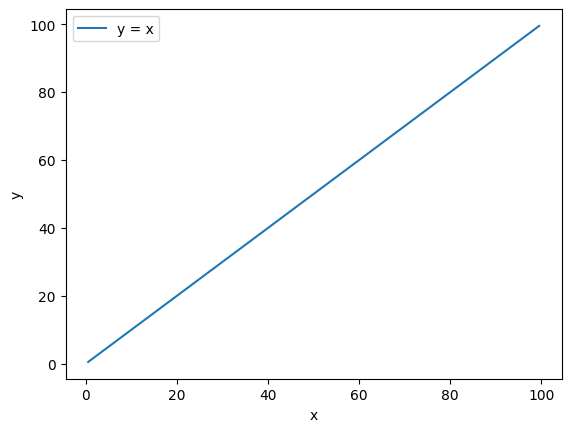

In [8]:
import matplotlib.pyplot as plt

x_values = np.arange(0.5, 100, 0.5)

y_values = x_values

plt.plot(x_values, y_values, label='y = x')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()


##
$$ y = x^2

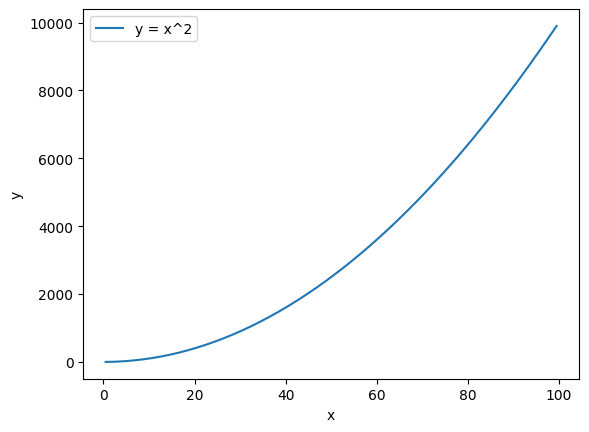

In [9]:
x_values = np.arange(0.5, 100, 0.5)

y_values = x_values**2

plt.plot(x_values, y_values, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

## 
$$ y = \frac{x^3}{100}

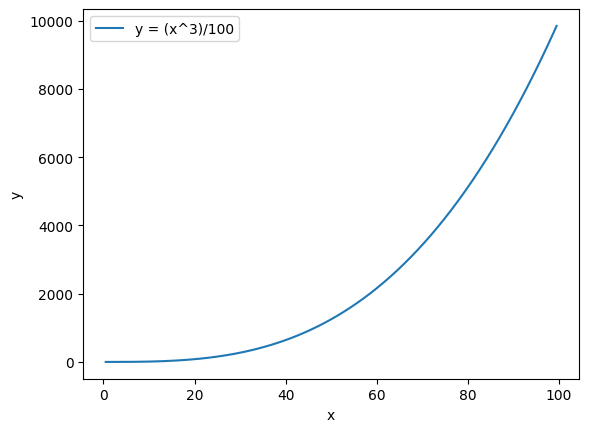

In [10]:
x_values = np.arange(0.5, 100, 0.5)

y_values = (x_values**3)/100

plt.plot(x_values, y_values, label='y = (x^3)/100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

##
$$ y = \sin(x)

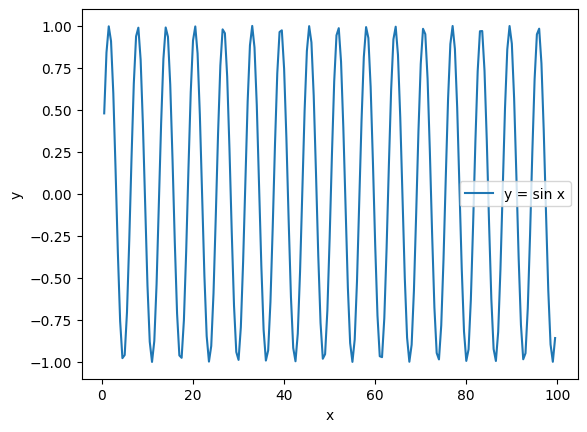

In [11]:
x_values = np.arange(0.5, 100, 0.5)

y_values = np.sin(x_values)

plt.plot(x_values, y_values, label='y = sin x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

##
$$ y = \frac{\sin(x)}{x}

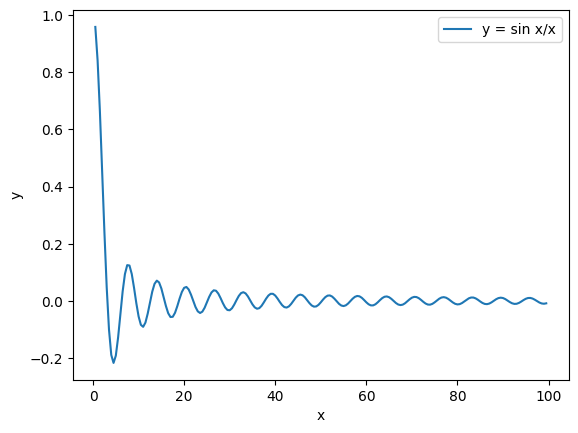

In [12]:
x_values = np.arange(0.5, 100, 0.5)

y_values = np.sin(x_values)/x_values

plt.plot(x_values, y_values, label='y = sin x/x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## 
$$ y = \log(x)

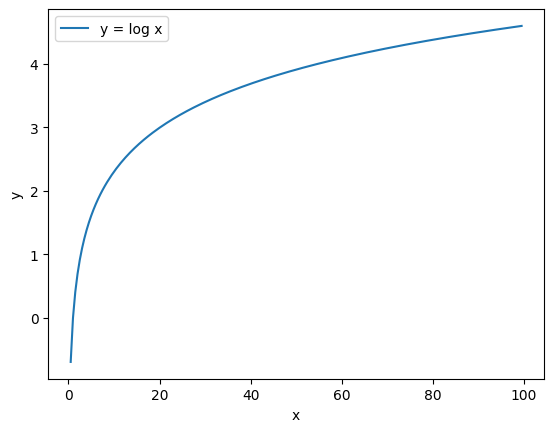

In [13]:
x_values = np.arange(0.5, 100, 0.5)

y_values = np.log(x_values)

plt.plot(x_values, y_values, label='y = log x')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

##
$$ y = e^x

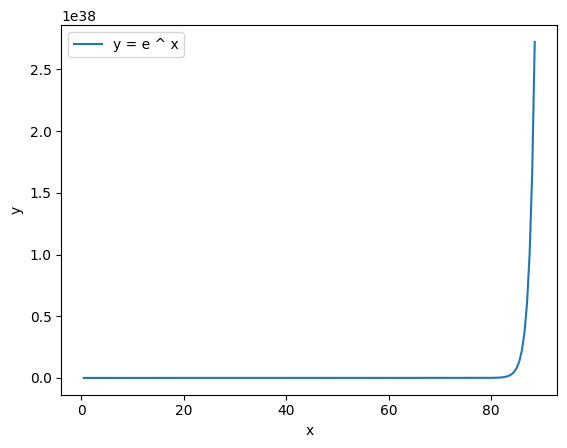

In [14]:
x_values = np.arange(0.5, 100, 0.5)

y_values = np.exp(x_values)

plt.plot(x_values, y_values, label='y = e ^ x')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

## Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [15]:
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])
print(df,"\n")

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

print("Column with the highest std deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


           a         b         c         d         e
0   1.746103  1.125851  1.995779  1.462671  1.606883
1   1.459361  1.369804  1.977926  1.654739  1.073595
2   1.827649  1.263682  1.972803  1.572915  1.712390
3   1.550086  1.605777  1.852928  1.796699  1.972616
4   1.524442  1.949666  1.974015  1.585287  1.953666
5   1.711906  1.222662  1.816222  1.862628  1.767563
6   1.310500  1.803418  1.626143  1.343365  1.968381
7   1.065402  1.023108  1.251478  1.370661  1.349148
8   1.632636  1.452538  1.594637  1.431803  1.922349
9   1.875109  1.777230  1.785210  1.962836  1.941284
10  1.893207  1.787525  1.672418  1.289892  1.955444
11  1.116206  1.437428  1.340846  1.902411  1.689914
12  1.996889  1.179765  1.829574  1.762585  1.346539
13  1.901339  1.844833  1.091260  1.442280  1.945738
14  1.885493  1.585376  1.281009  1.068092  1.053283
15  1.182779  1.225433  1.832915  1.815915  1.092531
16  1.289349  1.990998  1.912711  1.373632  1.660103
17  1.147435  1.551853  1.849062  1.441291  1.

## Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [16]:
# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df.sum(axis=1)

# Create a column "g" with values "LT8" if "f" is less than 8, and "GT8" otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
lt8_count = (df['g'] == 'LT8').sum()

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("DataFrame:")
print(df)
print("\nNumber of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' for 'LT8' rows:", std_lt8)
print("Standard deviation of 'f' for 'GT8' rows:", std_gt8)

DataFrame:
           a         b         c         d         e         f    g
0   1.746103  1.125851  1.995779  1.462671  1.606883  7.937286  LT8
1   1.459361  1.369804  1.977926  1.654739  1.073595  7.535425  LT8
2   1.827649  1.263682  1.972803  1.572915  1.712390  8.349439  GT8
3   1.550086  1.605777  1.852928  1.796699  1.972616  8.778107  GT8
4   1.524442  1.949666  1.974015  1.585287  1.953666  8.987076  GT8
5   1.711906  1.222662  1.816222  1.862628  1.767563  8.380982  GT8
6   1.310500  1.803418  1.626143  1.343365  1.968381  8.051807  GT8
7   1.065402  1.023108  1.251478  1.370661  1.349148  6.059796  LT8
8   1.632636  1.452538  1.594637  1.431803  1.922349  8.033962  GT8
9   1.875109  1.777230  1.785210  1.962836  1.941284  9.341670  GT8
10  1.893207  1.787525  1.672418  1.289892  1.955444  8.598485  GT8
11  1.116206  1.437428  1.340846  1.902411  1.689914  7.486806  LT8
12  1.996889  1.179765  1.829574  1.762585  1.346539  8.115351  GT8
13  1.901339  1.844833  1.091260  1.4

## Q12) Write a small piece of code to explain broadcasting in numpy.

In [17]:
array1 = np.array([[1, 2, 3], [4, 5, 6]])
scalar = 5

# Broadcasting: performing element-wise addition between array1 and scalar
result = array1 + scalar

print("Array 1:")
print(array1)
print("")
print("Scalar:")
print(scalar)
print("")
print("Result after broadcasting:")
print(result)

Array 1:
[[1 2 3]
 [4 5 6]]

Scalar:
5

Result after broadcasting:
[[ 6  7  8]
 [ 9 10 11]]


## Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [18]:
import numpy as np

def find_min(arr):
    min_val = arr[0]

    for i in range(len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]

    print("The min of the array using method 1 is", min_val)
    print("The min of the array using np is", arr[np.argmin(arr)])

array = np.array([1, 5, 8, 4, 2, 3, 98, 5, 2])

find_min(array)

The min of the array using method 1 is 1
The min of the array using np is 1
